# 1 - Introduction

Hello, it is Naufal and this is the notebook for my dashboard project. The dataset used can be downloaded from https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales. It is a historical sales data of a supermarket company, recorded in 3 different branches for 3 months. 

# 2 - Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px

I will use pandas, numpy and scipy to help with the analysis, then matplotlib, seaborn and plotly to do the visualization.

# 3 - Data Loading

In [2]:
df = pd.read_csv('supermarket_sales_cleaned.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
print(f'The dataset has {df.shape[0]} columns and {df.shape[1]} rows.')

The dataset has 1000 columns and 17 rows.


The columns are self-explanatory except maybe some.

Total = (Quantity x Unit price) + tax 5%

cogs = (Quantity x Unit price)

# 4 - Exploratory Data Analysis (EDA)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

The dataset contains categorical (object) and numerical (int, float) data types, as per above. Interestingly, the Date and Time columns are detected as objects. Let's convert them to appropriate data types.

In [70]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [71]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


Now, let's check for any missing values

In [74]:
print('Total number of missing value in the dataset :', df.isnull().sum().sum())

Total number of missing value in the dataset : 0


## Hypothesis Testing

### Hypothesis Testing 1

Checking out the rating given by the customers based on their gender.

In [5]:
df.groupby('Gender')['Rating'].mean()

Gender
Female    6.964471
Male      6.980962
Name: Rating, dtype: float64

Table above shows the average rating given by male and female customers to the supermarket company. 

From here, one can have the idea to question whether male customers give better rating than female customers, or vice versa.

Hypothesis statement:
* H0 : μFemaleRating = μMaleRating
* H1 : μFemaleRating != μMaleRating

Hypothesis testing using 2 tailed t-test for 2 samples:

In [54]:
female = df[(df['Gender']=='Female')]
male = df[(df['Gender']=='Male')]

In [55]:
t_stat, p_val = stats.ttest_ind(female['Rating'], male['Rating'])
print('P-value: ', p_val)
print('t-statistics: ', t_stat)

P-value:  0.8794969800191749
t-statistics:  -0.15164576973148555


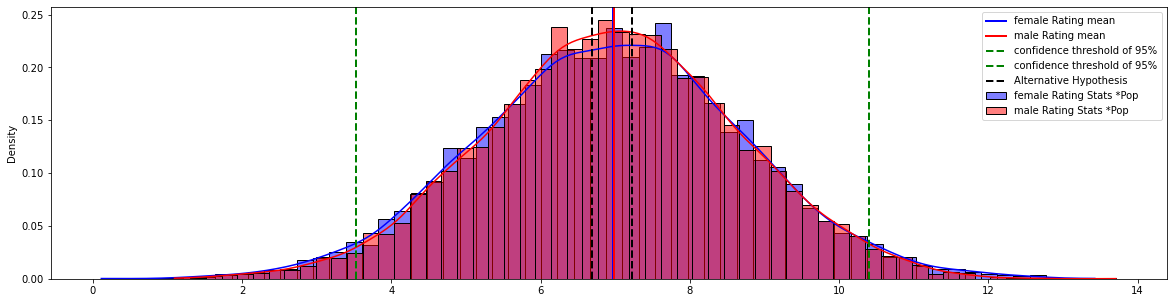

In [56]:
# Distribution chart
female_pop = np.random.normal(female['Rating'].mean(),female['Rating'].std(),10000)
male_pop = np.random.normal(male['Rating'].mean(),male['Rating'].std(),10000)

# confidence interval based on female
# choose cv = 0.05 -> since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, female['Rating'].mean(), female['Rating'].std())

plt.figure(figsize=(20,5))
sns.histplot(female_pop, label='female Rating Stats *Pop',color='blue', stat='density', kde=True)
sns.histplot(male_pop, label='male Rating Stats *Pop',color='red', stat='density', kde=True)
# mean
plt.axvline(female['Rating'].mean(), color='blue', linewidth=2, label='female Rating mean')
plt.axvline(male['Rating'].mean(), color='red',  linewidth=2, label='male Rating mean')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
# alternative hypotesis
plt.axvline(female_pop.mean()+t_stat*female_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(female_pop.mean()-t_stat*female_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()
#print(ci[0])

P-value is above the $\alpha$ (0.05). 

Black dashed-line (the alternative hypothesis) is located inside of the confidence interval. 

We fail to reject H0 (μFemaleRating = μMaleRating). 

In another word, the average rating given by the female and male customers are not significantly different.

### Hypothesis Testing 2

Checking out the average gross income in each city.

In [57]:
df.groupby('City')['gross income'].mean()

City
Mandalay     15.232024
Naypyitaw    16.052367
Yangon       14.874001
Name: gross income, dtype: float64

Table above shows the average gross income of each city. 

Given this information, one can have question which city has higher gross income than the other cities. 

Or did every city generate the same gross income?

Hypothesis statement:
* H0 : μMandalay = μNaypyitaw = μYangon
* H1 : μMandalay != μNaypyitaw != μYangon

Hypothesis testing using ANOVA:

In [58]:
man = df[(df['City']=='Mandalay')]['gross income']
nay = df[(df['City']=='Naypyitaw')]['gross income']
yan = df[(df['City']=='Yangon')]['gross income']
gross_man = df[(df['City']=='Mandalay')]
gross_nay = df[(df['City']=='Naypyitaw')]
gross_yan = df[(df['City']=='Yangon')]

In [59]:
f_stat, p_value = stats.f_oneway(man, nay, yan)
print('P-value: ', p_value)

P-value:  0.413210174367147


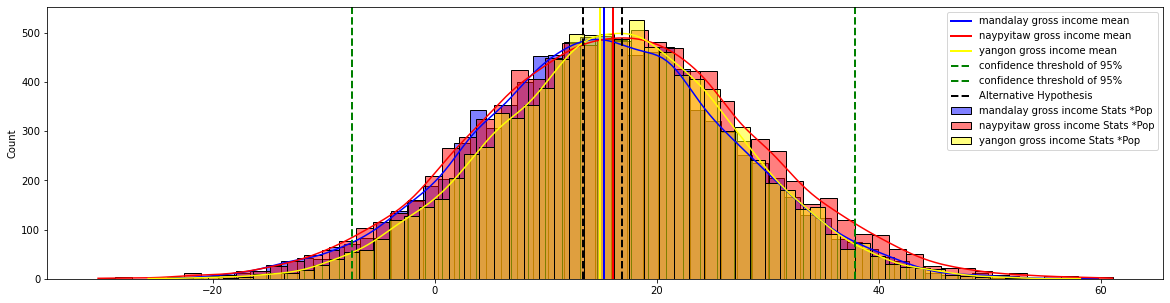

In [60]:
mandalay_pop = np.random.normal(gross_man['gross income'].mean(),gross_man['gross income'].std(),10000)
naypyitaw_pop = np.random.normal(gross_nay['gross income'].mean(),gross_nay['gross income'].std(),10000)
yangon_pop = np.random.normal(gross_nay['gross income'].mean(),gross_yan['gross income'].std(),10000)

# confidence interval based on gross_man
# choose cv = 0.05 -> since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, gross_man['gross income'].mean(), gross_man['gross income'].std())

fig = plt.figure(figsize=(20,5))
sns.histplot(mandalay_pop, label='mandalay gross income Stats *Pop',color='blue', kde=True)
sns.histplot(naypyitaw_pop, label='naypyitaw gross income Stats *Pop',color='red', kde=True)
sns.histplot(yangon_pop, label='yangon gross income Stats *Pop',color='yellow', kde=True)
# mean
plt.axvline(gross_man['gross income'].mean(), color='blue', linewidth=2, label='mandalay gross income mean')
plt.axvline(gross_nay['gross income'].mean(), color='red',  linewidth=2, label='naypyitaw gross income mean')
plt.axvline(gross_yan['gross income'].mean(), color='yellow',  linewidth=2, label='yangon gross income mean')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
# alternative hypotesis
plt.axvline(mandalay_pop.mean()+t_stat*mandalay_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(mandalay_pop.mean()-t_stat*mandalay_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()
#print(ci[0])   

P-value is above $\alpha$.

We fail to reject H0 (μMandalay = μNaypyitaw = μYangon). 

The alternative hypothesis (black dashed-line) is located inside of the confidence interval.

In another word, the average gross income is not significantly different among the three cities.

## Data Visualization

***Product line***

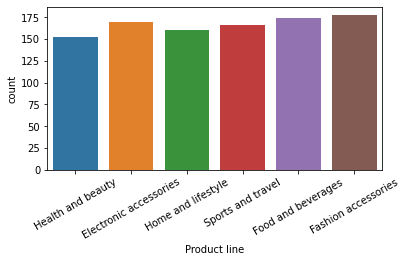

In [63]:
fig = plt.figure(figsize=(6,3))
bar = sns.countplot(x='Product line', data=df,)
bar.set_xticklabels(bar.get_xticklabels(),rotation = 30)
plt.show()

The figure above shows the product count for each product line listed in the dataset.

As we can see, the highest count is held by Fashion accessories and then followed by Food and beverages by a slim margin.

We can see more details in table below:

In [65]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

***Stat per branch***

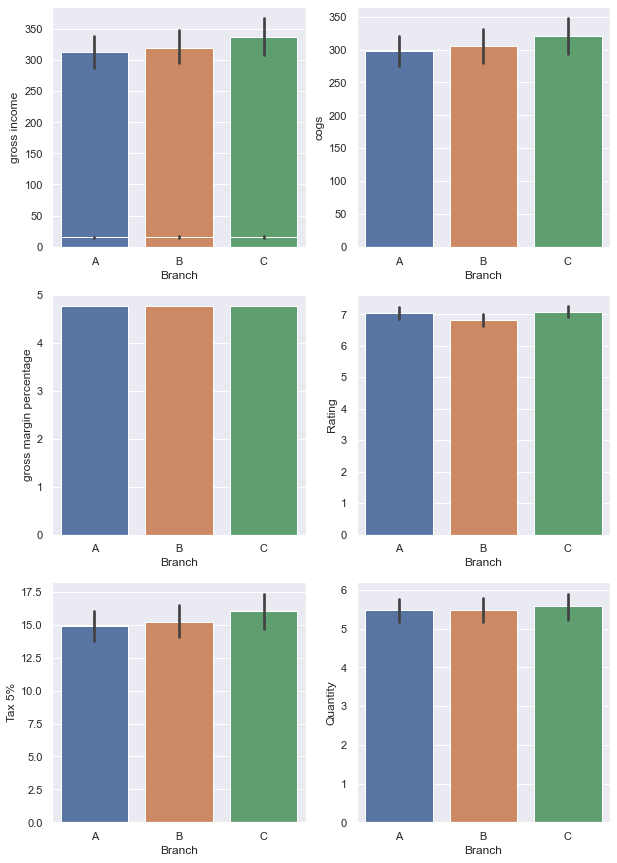

In [105]:
fig, axes = plt.subplots(3, 2, figsize=(10,15))
sns.barplot(x=df['Branch'], y=df['Total'], order=['A', 'B', 'C'], ax=axes[0,0])
sns.barplot(x=df['Branch'], y=df['cogs'], order=['A', 'B', 'C'], ax=axes[0,1])
sns.barplot(x=df['Branch'], y=df['gross income'], order=['A', 'B', 'C'], ax=axes[0,0])
sns.barplot(x=df['Branch'], y=df['Rating'], order=['A', 'B', 'C'], ax=axes[1,1])
sns.barplot(x=df['Branch'], y=df['gross margin percentage'], order=['A', 'B', 'C'], ax=axes[1,0])
sns.barplot(x=df['Branch'], y=df['Quantity'], order=['A', 'B', 'C'], ax=axes[2,1])
sns.barplot(x=df['Branch'], y=df['Tax 5%'], order=['A', 'B', 'C'], ax=axes[2,0])
plt.show()

***Stat per branch in a pie chart***

In [80]:
#select_att = st.selectbox('Select an attribute to see the stat in pie chart', options=('Total', 'cogs', 'gross income', 'gross margin percentage', 'Quantity', 'Tax 5%'), index=0)
fig4 = px.pie(df, values='Total', names='Branch', title=f'Sum of Total per branch', hole=.3)
fig4.update_traces(textposition='inside', textinfo='percent+label')
fig4.update_layout(uniformtext_minsize=18, uniformtext_mode='hide')
fig4.show()

The dataset is clearly fabricated rather "lazily". The percentage of each branch is almost the same for all the attributes.

Another possibility is that the dataset contributor is purposely trying to make the dataset as easy to read as possible.

***Stat per city***

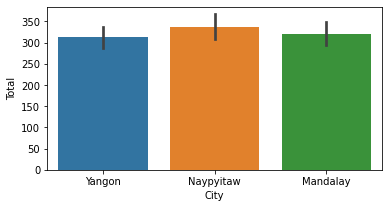

In [82]:
#select_col2 = st.selectbox('Select an attribute to see the stat per city', options=('Total', 'cogs', 'gross income', 'Rating'), index=0)
fig2, ax2 = plt.subplots(figsize=(6,3))
sns.barplot(x=df['City'], y=df['Total'])
plt.show()

***Stat in time series***

In [83]:
#select_col3 = st.selectbox('Select an attribute', options=('Total', 'cogs', 'gross income', 'Rating'), index=0)
fig3 = px.bar(df, x='Date', y='Total', color='Branch', hover_data={"Date": "|%B %d, %Y"})
fig3.update_xaxes(rangeslider_visible=True)
fig3.show()

Note: A range slider located at the bottom is available to select a date range.

# 5 - Conclusion

A program that includes data visualization (minimum of 4 figures) and hypothesis testing has been made.

Two hypothesis testings has been done: 
* result from 1st hypothesis testing: the average rating given by the female and male customers are not significantly different.
* result from 2nd hypothesis testing: the average gross income is not significantly different among the three cities.

More than 4 figures have been shown. 